<p align="left">
<img src="https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/Image/ibm-logo.png"
width="500" />
</p>

# **Supervised Machine Learning: Regression**

**Notebook content**
> **WEEK 3** - Regression with Regularization Techniques: Ridge, LASSO and Elastic Net
> * 3.1 - Regularization Techniques
> * 3.2 - Polynomial Features and Regularization Demo
> * 3.3 - Details of Regularization

# **Week 3.1 - Regularization Techniques**

Notebook of my notes for the week 3.1 of the course [Supervised Machine Learning: Regression](https://www.coursera.org/learn/supervised-machine-learning-regression) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

## **BIAS VARIANCE TRADE OFF**

### **Bias and Variance: Intuition**

* **Bias:** is a tendency to miss

* **Variance:** is tendency to be inconsistent

Ideally we want a low bias and low variance model: highly consistent predictions that are clo to perfect average.

* **Tendency:** expectation of out-of-sample behavior over many training set samples.


<p align="left">
<img src="https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/02%20-%20Supervised%20Machine%20Learning%20-%20Regression/Images/Variance%20X%20Bias.JPG"
width="400" />
</p>




### **3 Sources of Model Error**

* being wrong $\longrightarrow$ **Bias**
* being unstable $\longrightarrow$ **Variance**
* unavoidable randomness $\longrightarrow$ **Irreducible Error**


**High Bias**

>Tendency of predictions to miss true values.
>
>- Worsened by missing information, overly-simplistic assumptions.
>- Miss real patterns 
>
> Associated with **UNDERFIT** and low complexity models.

**High Variance**

> Tendency of predictions to fluctuate.
>
>- Characterized by sensitivy or output to small changes in input data.
>- Often due to overly complex or poorly-fit models
>
> Associated with **OVERFIT** and overly complex models.

**Irreductible Error**

> Tendency to intrinsic uncertanty/randomness.
>
>- Present in even the best possible model.

### **Bias-Variance Tradeoff**

Summary of bias-variance tradeoff:
- Model adjustment that decrease bias often increase variance, and vice versa.
- The bias-variance tradeoff is analogous to a **complexity tradeoff**.
- Finding the best model means choosing the right level of complexity.
- Want a model elaborate enough to **not underfit**, but not so exceedingly elaborate that it **overfit**.

<p align="left">
<img src="https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/02%20-%20Supervised%20Machine%20Learning%20-%20Regression/Images/Bias%20Variance%20Tradeoff.JPG"
width="500" />
</p>

- The higher the degree of a polynomial regression, the more complex the model (lower bias, higher variance).

- At lower degrees, we can see **visual signs of bias**: predictions are too rigid to capture the curve pattern in the data.
- At higher degrees, we see **visual signs of variance**: predictions fluctuate widly because of the model's sensitivity.
- The goal is to find the right degree, such that the model has sufficient complexity to describe the data without overfitting.





## **REGULARIZATION**

### **Regularization**

Another way of tuning the model other than with polynomial degrees is by using **regularization**.

**Whta does Regularization Accomplish?**

Adjusted cost function: $M(w)+\lambda R(w)$

* $M(w)$: model error
* $R(w)$: function of estimated parameter(s)
* $\lambda$: regularization strength parameter

Regularization adds an (adjustable) **regularization strength** parameter directly into the cost function.

This $\lambda$ (lambda) adds a penalty proportional to the size of the estimated model parameter, or a function of the parameter. The larger the $\lambda$ the more we penalize stronger parameters, and the less complex this model will be.

Increasing the cost function controls the amount of the penalty.

The **regularization strength** parameter $\lambda| allows us to manage the **complexity tradeoff**:
- **more** regularization introduces a simpler model or more bias.
- **less** regularization makes the model more complex and increases variance.

If our model is overfit (variance too high), regularization can improve the generalization error and reduce variance.

### **Regularization and Feature Selection**

Regularization performs feature selection by shrinking the contribution of features.

For L1-regularization, this is accomplished by driving some coefficients to zero.

Feature selection can also be performed by removing features.

**Why if Feature Selection Important?**

Reducing the number of features can prevent overfitting.

For some models, fewer features can improve fitting time and/or results.

Identifying most critical features can improve model interpretability.

## **RIDGE REGRESSION (L2)**

Keep in mind that scaling matters now, unlike linear regression.

This can be done by **standardization technique**:

$$
x'=\frac{x- \bar x }{\sigma}
$$

**Ridge Regression:** the complexity penalty $\lambda$ is applied proportionally to squared coefficient values.
- The penalty term has the effect of "shrinking" coefficients toward 0.
- This imposes bias on the model, but also reduces variance.
- We can select the best regularization strength lambda via cross-validation.
- It's best practice to scale features (i.e. using StandardScaler) so penalties arent impacted by variable scale.

$$
J(\beta_{0},\beta_{1})=\frac{1}{2m} \sum_{i=1} ^{m}((\beta_{0}+\beta_{1}x_{obs}^{(i)})-y_{obs}^{(i)})^{2}+\lambda \sum_{j=1} ^{k} \beta_{j}^{2}
$$


## **LASSO REGRESSION (L1)**

Keep in mind that scaling matters now, unlike linear regression.

In **LASSO regression**: the complexity penalty $\lambda$ is proportional to the absolute value of coefficients.
- LASSO: Least Absolute Shrinkage and Selection Operator.
- Similar effect to **Ridge** in terms of complexity tradeoff: increasing lambda raises bias but lower variance.
- LASSO is more likely than Ridge to perform **feature selection**, in that for a fixed $\lambda$, LASSO is more likely to result in coefficients being set to zero.

$$
J(\beta_{0},\beta_{1})=\frac{1}{2m} \sum_{i=1} ^{m}((\beta_{0}+\beta_{1}x_{obs}^{(i)})-y_{obs}^{(i)})^{2}+\lambda \sum_{j=1} ^{k} |\beta_{j}|
$$

Penalty selectively shrinks some coefficients.

Can be used for feature selection.

Slower to converge than Ridge regression.

## **ELASTIC NET**

Keep in mind that scaling matters now, unlike linear regression.

**Elastic Net** is an hybrid approach, that introduces a new parameter $\alpha$ (alpha) that determines a weighted average of L1 and L2 penalties.

Validation gives us an empirical method for selecting between different models.

$$
\lambda \sum_{j=1}^{p}(\alpha \beta_{j}^{2} + (1 - \alpha)| \beta_{j}|)
$$

**Elastic Net Regularization**

$$
J(\beta_{0},\beta_{1})=\frac{1}{2m} \sum_{i=1} ^{m}((\beta_{0}+\beta_{1}x_{obs}^{(i)})-y_{obs}^{(i)})^{2}+\lambda \sum_{j=1} ^{k} |\beta_{j}|+\lambda_{2} \sum_{j=1} ^{k} \beta_{j}^{2}
$$

**Elastic Net** combines penaltis from both **Ridge** and **LASSO** regression.

It requires tuning of an additional parameter that determines emphasis of L1 vs. L2 regularization penalties.

## **RECURSIVE FEATURE ELIMINATION**

### **Recursive Feature Elimination (RFE)** 

Is an approach that combines:
- A model or estimation approach
- A desired number of features

RFE then repeatedly applies the model, measures feature importance, and recursively removes less important features.

### **Syntax**

Import the class containing the feature selection method


```
from sklearn.feature_selection import RFE
```

Create an instance of the class


```
rfeMod = RFE(model, n_features_to_select=5)
```
The model can be any algorithm that has `feature importances` or `coefficients`. It can be a `linear regression`, `LASSO` or even a more complex like `random forest`.

Fit the instance on the data and then predict the expected value


```
rfeMod = rfeMod.fit(X_train, y_train)
y_predict = rfeMod.predict(X_test)
```






### **RFECV**

The **RFECV** class will perform feature elimination using cross validation.

# **Week 3.2 - Polynomial Features and Regularization Demo**

Notebook of my notes for the week 3.2 of the course [Supervised Machine Learning: Regression](https://www.coursera.org/learn/supervised-machine-learning-regression) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

### **Section 2, Part d:**  Regularization and Gradient Descent

**Introduction**

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

#### **Question 1**

* Import the data. 

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/02%20-%20Supervised%20Machine%20Learning%20-%20Regression/Data/X_Y_Sinusoid_Data.csv'

data = pd.read_csv(url)

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [ ]:
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


[Text(0, 0.5, 'y data'), Text(0.5, 0, 'x data')]

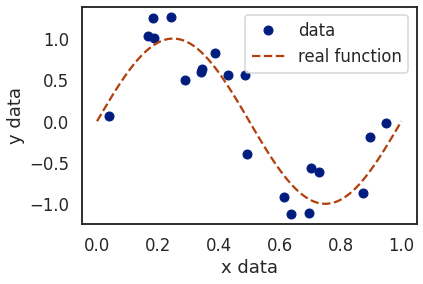

In [ ]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = data.plot('x', 'y', ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')

#### **Question 2**


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

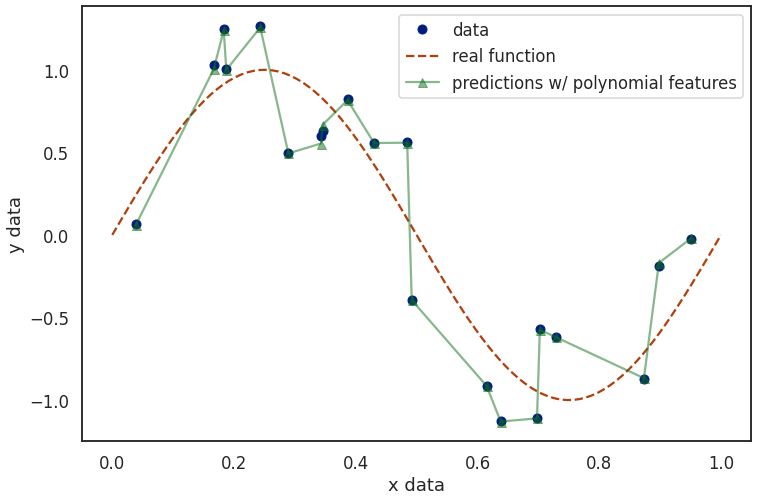

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial feature
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract X- and Y- data from the dataframe
X_data = data[['x']]
Y_data = data['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the results
plt.figure(figsize=(12,8))
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=0.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

#### **Question 3**

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

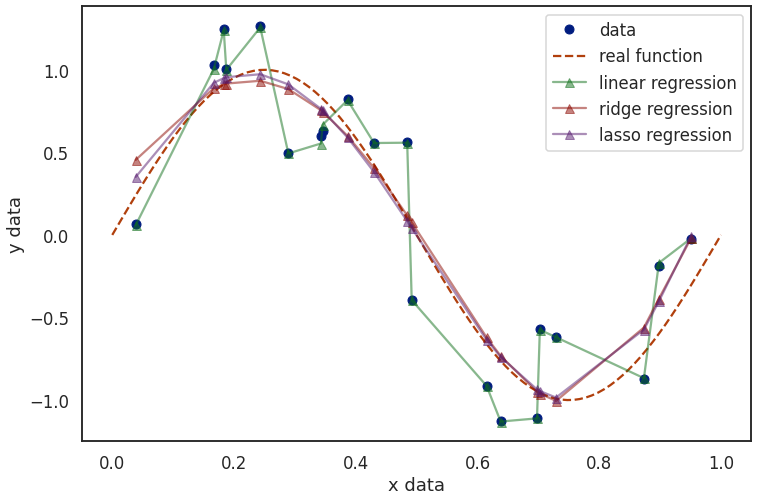

In [ ]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The Ridge Regression
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The Lasso Regression
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.figure(figsize=(12,8))
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=0.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=0.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=0.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [ ]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_
coefficients['ridge regression'] = rr.coef_
coefficients['lasso regression'] = lassor.coef_
coefficients = coefficients.applymap(abs)

coefficients.describe() # Huge difference in scale between non-regularized vs. regularized regressions

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.761504e+13,2.169397,2.167284
std,6.017426e+13,2.900278,4.706731
min,1.610728e+07,0.000000,0.000000
25%,3.402091e+12,0.467578,0.000000
50%,3.614874e+13,1.017272,0.252181
75%,1.068696e+14,2.883507,1.641353
max,1.652485e+14,12.429635,20.176708


In [ ]:
# here we can see the lasso reducing a number of coefficients to zero
(coefficients>0).sum()

linear regression    21
ridge regression     20
lasso regression     15
dtype: int64

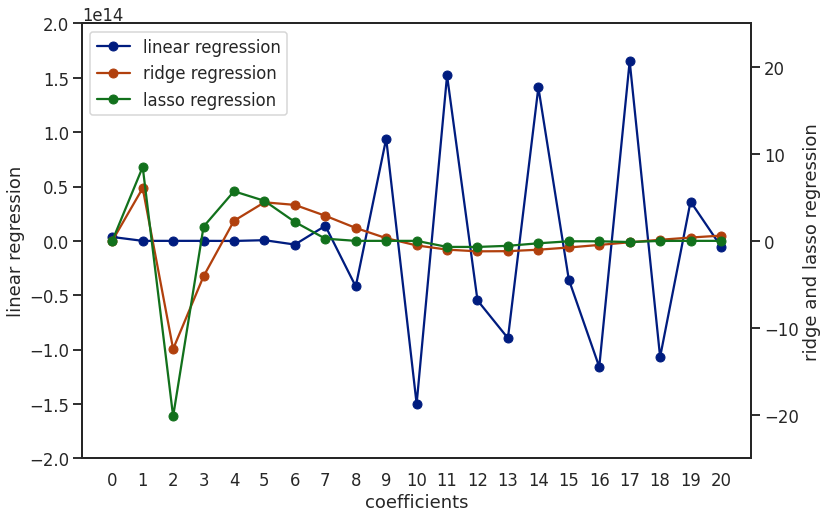

In [ ]:
colors = sns.color_palette()

plt.figure(figsize=(12,8))

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), color=colors[0], marker='o', label='linear regression')


# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients', ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

#### **Question 4**

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
url = 'https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/02%20-%20Supervised%20Machine%20Learning%20-%20Regression/Data/Ames_Housing_Sales.csv'

data = pd.read_csv(url)

In [ ]:
# One hot encoding
data = pd.get_dummies(data, drop_first=True)
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=252)

In [ ]:
# Split train test sets
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
# Create a list of columns that are no one hot encoded
mask = data.apply(lambda x: x.nunique())>2
num_cols = data.columns[mask]

In [ ]:
skew_limit = 0.75
skew_vals = train[num_cols].skew()

skew_cols = (skew_vals[skew_vals > skew_limit].sort_values(ascending=False).to_frame().rename(columns={0: 'Skew'}))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
KitchenAbvGr,5.497813
ScreenPorch,4.599803
BsmtFinSF2,4.466378
BsmtHalfBath,3.882163
EnclosedPorch,3.218303


Transform all the columns where the skew is greather than 0.75, excluding `SalePrice`.

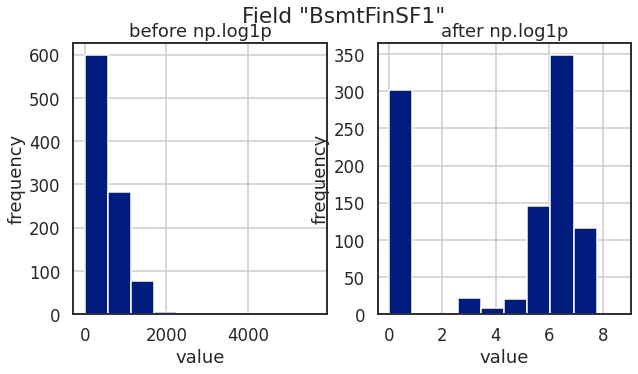

In [ ]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# a little bit better

In [ ]:
# Mute the setting with a copy warnings
pd.options.mode.chained_assignment = None

# Log transformation
for col in skew_cols.index.tolist():
  if col == 'SalePrice':
    continue
  train[col] = np.log1p(train[col])
  test[col] = test[col].apply(np.log1p) # same thing

In [ ]:
# Separate features from predictor
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test = test[feature_cols]
y_test = test['SalePrice']

#### **Question 5**

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
  return np.sqrt(mean_squared_error(ytrue, ypredicted))

* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

78634.28580633736


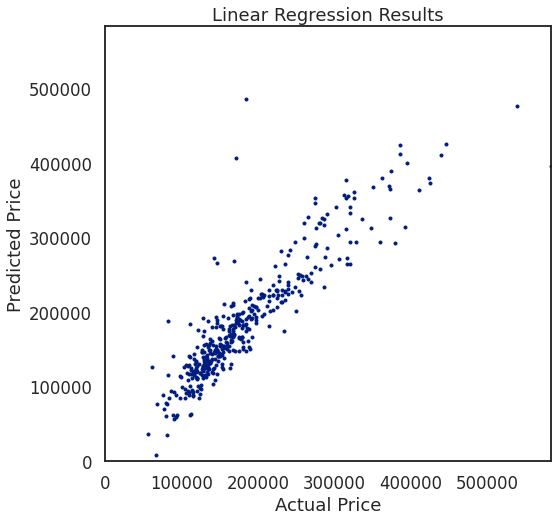

In [ ]:
f = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

#### **Question 6**

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

10.0 32205.825151330868


#### **Question 7**


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([0.005, 0.05, 0.1, 1, 5, 20, 50, 80, 100, 120, 140])

lassoCV = LassoCV(alphas=alphas2, max_iter=5e4, cv=4).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)

120.0 37010.761796394465


We can determine how many of these features remain non-zero.

In [ ]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), len(lassoCV.coef_.nonzero()[0])))

Of 251 coefficients, 102 are non-zero with Lasso.


Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, l1_ratio=l1_ratios, max_iter=1e4).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.1 0.9 32213.839417433966


Comparing the RMSE calculation from all models is easiest in a table.

In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasse', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=True)
rmse_df

,RMSE
Linear,78634.285806
Ridge,32205.825151
Lasse,37010.761796
ElasticNet,32213.839417


We can also make a plot of actual vs predicted housing prices as before.

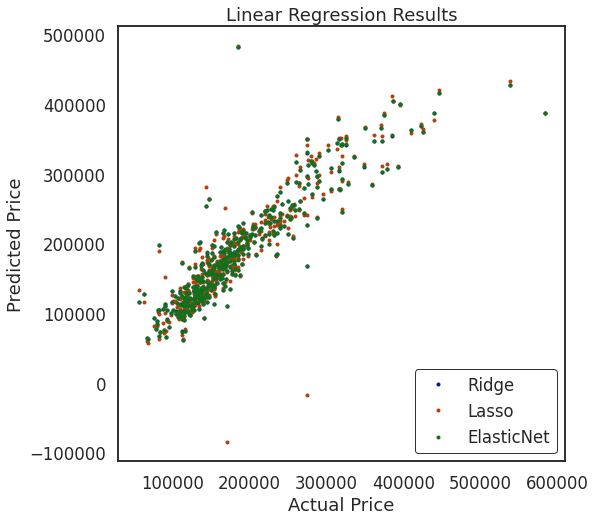

In [ ]:
f = plt.figure(figsize=(8,8))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
  ax.plot(y_test, mod.predict(X_test), marker='o', ls='', ms=3.0, label=lab)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       title='Linear Regression Results');

# **Week 3.3 - Details of Regularization**

Notebook of my notes for the week 3.3 of the course [Supervised Machine Learning: Regression](https://www.coursera.org/learn/supervised-machine-learning-regression) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

## **HOW REGULARIZATION WORKS**

### **Analytic View**

Increasing L2/L1 penalties force coeeficients to be smaller, restricting their plausible range.

A smaller range for coefficients must be simpler/lower variance than a model with an infinite possible coefficient range.

### **Geometric View**

Below are mathematically equivalent formulations of the optimization objectives of Ridge/LASSO

* **Ridge**

minimize $\beta$ 
$$\{\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^2\} $$ 

subject to 

$$ \sum_{j=1}^{p}\beta_{j}^{2}\leq S$$


* **LASSO**

minimize $\beta$ 
$$\{\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^2\} $$ 

subject to 

$$ \sum_{j=1}^{p}|\beta_{j}|\leq S$$


### **Probabilistic View**

$$
p(\beta|X,Y)\alpha f(Y|X,\beta)p(\beta|X)=f(Y|X,\beta)p(\beta)
$$
<br>
$$
p(\beta)=\Pi_{j=a}^{p}g(\beta_{j})
$$

**Bayes:** Regularization imposes certain priors on the regression coefficients.

Letting $f$ be the likelihood (probability of target given parameter vector $\beta$), and $p(\beta)$ the prior distribution of $\beta$, we can calculate the posterior of $\beta$.

$p(\beta)$ is derived from independent draws of a prior coefficient density function $g$ that we choose when regularizing.

L2 (ridge) regularization imposes a **Gaussian prior** on the coefficients, while L1 (lasso) regularization imposes a **Laplacian prior**.

Visualizing these prior distributions again reveals the difference in behavior between Ridge and LASSO: the Laplacian distribution has peaked density at 0, explaining its tendency to zero out some coefficients.

<p align="left">
<img src="https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/02%20-%20Supervised%20Machine%20Learning%20-%20Regression/Images/Probabilistic%20View.JPG"
width="800" />
</p>


## **REGULARIZATION RECAP**

**Complexity Tradeoff**

>Reduce complexity by penalizing it in cost function.
>
>Increases bias, but reduces variance (may be worth the trade-off).
>
>Options: L2, L1, can validate the choice and strength.


**Regularization**

> Optimizing predictive models is about finding the right bias/variance tradeoff.
>
>We need models that are sufficient complex to capture patterns in data, but not so complex that they overfit.

**How it Works**

> **Analytically:**penalty constrains the coefficient range.
>
> **Geometrically:** L1/L2 imposes bounded regions.
>
> **Probabilistically:** imposes prior on coefficients.

### **Section 2, Part e:** Regularization LAB

**Learning objectives**

By the end of this lesson, you will be able to:

* Implement data standardization
* Implement variants of regularized regression
* Combine data standardization with the train-test split procedure
* Implement regularization to prevent overfitting in regression problems

#### **Helper.py**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(72018)

from sklearn.datasets import load_boston

def to_2d(array):
    return array.reshape(array.shape[0], -1)

def boston_dataframe(description=False):
    boston = load_boston()
    
    data = boston.data
    target = boston.target
    names = boston.feature_names
    
    target = to_2d(target)
    
    data_all = np.concatenate([data, target], axis=1)
    names_all = np.concatenate([names, np.array(['MEDV'])], axis=0)
    
    if description:
        
        return pd.DataFrame(data=data_all, columns=names_all), boston.DESCR
    
    else: 
        
        return pd.DataFrame(data=data_all, columns=names_all)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [ ]:
np.set_printoptions(precision=3, suppress=True)

#### **Loading in Boston Data**

In [ ]:
boston = boston_dataframe(description=True)
boston_data = boston[0]
boston_description = boston[1]

#### **Data standardization**

**Standardizing** data refers to transforming each variable so that it more closely follows a **standard** normal distribution, with mean 0 standard deviation 1.

The `StandarScaler` object in Scikit Learn can do this.

**Generate X and y:**

In [ ]:
y_col = 'MEDV'

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Import, fit and transform using `StandardScaler`**

In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

#### **Exercise 1:** Confirm standard scaling

In [ ]:
X2 = np.array(X)
man_transform = (X2-X2.mean(axis=0))/X2.std(axis=0)
np.allclose(man_transform, X_ss)

True

#### **Coefficients with and without scaling**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

y_col = 'MEDV'

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

In [ ]:
lr.fit(X, y)
print(lr.coef_) # min = -18

[ -0.108   0.046   0.021   2.687 -17.767   3.81    0.001  -1.476   0.306
  -0.012  -0.953   0.009  -0.525]


**Discussion:**

The coefficients are on widely different scales. Is this "bad"?

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s = StandardScaler()
X_ss = s.fit_transform(X)

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients now "on the same scale"

[-0.928  1.082  0.141  0.682 -2.057  2.674  0.019 -3.104  2.662 -2.077
 -2.061  0.849 -3.744]


#### **Exercise 2:** Most impactful features

Based on these results, what is the most "impactful" feature (this is intended to be slightly ambiguous)? "In what direction" does it affect "y"?

**Hint:** Recall from last week that we can "zip up" the names of the features of a DataFrame `df` with a model `model` fitted on that DataFrame using:

```python
dict(zip(df.columns.values, model.coef_))
```


In [ ]:
pd.DataFrame(zip(X.columns, lr2.coef_)).sort_values(by=1)

,0,1
12,LSTAT,-3.743627
7,DIS,-3.104044
9,TAX,-2.076782
10,PTRATIO,-2.060607
4,NOX,-2.056718
0,CRIM,-0.928146
6,AGE,0.019466
2,INDUS,0.140900
3,CHAS,0.681740
11,B,0.849268


Looking just at the strength of the standardized coefficients LSTAT, DIS, RM and RAD are all the 'most impactful'. Sklearn does not have built in statistical signifigance of each of these variables which would aid in making this claim stronger/weaker

#### **Lasso with and without scaling**

We discussed Lasso in lecture. 

Let's review together:

1. What is different about Lasso vs. regular Linear Regression?
1. Is standardization more or less important with Lasso vs. Linear Regression? Why?

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

**Create polynomial features**

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Note:** We use `include_bias=False` since `Lasso` include a bias by default.

In [ ]:
X_pf_ss = s.fit_transform(X_pf)

**Lasso**

In [ ]:
las = Lasso()
las.fit(X_pf_ss, y)
las.coef_

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.991,  0.   , -0.   , -0.   ,  0.   , -0.   ,
        0.068, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.05 , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   , -0.   ,  3.3  , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.42 , -3.498, -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.146, -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ])

#### **Exercise 3:** Compare Lasso's alphas

Compare 

* Sum of magnitudes of the coefficients
* Number of coefficients that are zero

for Lasso with alpha 0.1 vs. 1.

Before doing the exercise, answer the following questions in one sentence each:

* Which do you expect to have greater magnitude?
* Which do you expect to have more zeros?

In [ ]:
las01 = Lasso(alpha=0.1)
las01.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las01.coef_).sum())
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 26.138682362877965
number of coefficients not equal to 0: 23


In [ ]:
las1 = Lasso(alpha=1)
las1.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las1.coef_).sum())
print('number of coefficients not equal to 0:', (las1.coef_!=0).sum())

sum of coefficients: 8.47240504455307
number of coefficients not equal to 0: 7


With more regularization (higher alpha) we will expect the penalty for higher weights to be greater and thus the coefficients to be pushed down. Thus a higher alpha means lower magnitude with more coefficients pushed down to 0.

#### **Exercise 4:** $R^{2}$

Calculate the $R^2$ of each model without train/test split.

Recall that we import $R^2$ using:

```python
from sklearn.metrics import r2_score
```

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, las.predict(X_pf_ss))

0.7207000417838496

In [ ]:
r2_score(y, las01.predict(X_pf_ss))

0.8366045990855128

**Discuss:**

Will regularization ever increase model performance if we evaluate on the same dataset that we trained on?

#### **With train/test split**

**Discuss:**

Are there any issues with what we've done so far?

**Hint:** Think about the way we have done feature scaling.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

In [ ]:
X_train_s = s.fit_transform(X_train)
las.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las.predict(X_test_s)
r2_score(y_pred, y_test)

0.33177406838134416

In [ ]:
X_train_s = s.fit_transform(X_train)
las01.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las01.predict(X_test_s)
r2_score(y_pred, y_test)

0.7102444090776476

Exercise


**Part 1:**

Do the same thing with Lasso of:

* `alpha` of 0.001
* Increase `max_iter` to 100000 to ensure convergence. 

Calculate the $R^2$ of the model.

Feel free to copy-paste code from above, but write a one sentence comment above each line of code explaining why you're doing what you're doing.

**Part 2:**

Do the same procedure as before, but with Linear Regression.

Calculate the $R^2$ of this model.

**Part 3:**

Compare the sums of the absolute values of the coefficients for both models, as well as the number of coefficients that are zero. Based on these measures, which model is a "simpler" description of the relationship between the features and the target?

In [ ]:
# Part 1

# Decreasing reguarization and ensuring convergence
las001 = Lasso(alpha=0.001, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to trainig set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

#Calculating r2 score
print('r2 score for alpha - 0.001:', r2_score(y_pred, y_test))

r2 score for alpha - 0.001: 0.8686454101886707


In [ ]:
# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# Predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print('r2 score for Linear Regression:', r2_score(y_pred_lr, y_test))

r2 score for Linear Regression: 0.8555202098064171


In [ ]:
# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coefficients not equal to 0 for Lasso:,', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coefficients not equal to 0 for Linear Regression:,', (lr.coef_!=0).sum())

Magnitude of Lasso coefficients: 436.26164263065647
Number of coefficients not equal to 0 for Lasso:, 89
Magnitude of Linear Regression coefficients: 1185.285825446812
Number of coefficients not equal to 0 for Linear Regression:, 104


#### **L1 vs. L2 Regularization**

As we have seen: `Lasso` and `Ridge` regression have the same syntax in SciKit Learn.

Now we're going to compare the results from Ridge vs. Lasso regression:

**Ridge**

In [ ]:
from sklearn.linear_model import Ridge

#### **Exercise 5:** Ridge vs. Lasso

1. Define a Ridge object `r` with the same `alpha` as `las001`.
2. Fit that object on `X` and `y` and print out the resulting coefficients.

In [ ]:
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_

array([  8.727,  10.354, -24.683,   5.299,  -3.13 ,  14.781,  22.301,
       -23.483,  27.356,  -1.512,  16.949,  22.531,  11.444,   1.055,
         0.437,  14.259,   1.83 ,  -8.737,   4.726,  -3.748,  -3.557,
       -16.521,  -6.918,   6.064,  -1.363,   4.604,  -1.303,  -0.057,
        -0.301, -12.828,   2.016,   1.084,  -0.655,  -1.092,   4.458,
        -4.247,   4.156,  -1.282,   8.71 ,  -0.285,  -8.595,  11.595,
         6.544,   1.271,   1.827,   1.007,   1.554,   5.173,  -4.685,
         5.299,  -3.199,  -8.715,   0.983,   1.119,   0.284,  -1.683,
        -2.884,   2.985,  -0.756,  12.297,   0.931,  -7.594,  18.292,
       -22.124,  35.725, -21.894,  -7.789,   1.774,   4.101, -12.263,
        -3.741,  -5.525, -16.111,  -5.706,  -4.666,  -9.884,   0.989,
        -0.092,  17.145, -14.214,  -2.955,  -2.785,  -5.404,  11.825,
         0.085,  -4.352,  -5.616,  -2.843,   0.826, -29.129,  49.636,
       -21.571,  -1.263,  -8.811, -15.822,  11.975,  -1.023,   2.911,
        -0.656,  -4.

In [ ]:
las001.coef_

array([  0.   ,   0.   , -16.945,   2.562,   0.   ,  13.392,   9.907,
       -19.96 ,   9.039,   0.   ,   6.138,  17.628,  11.446,   1.21 ,
         0.226,  11.578,   2.197,  -7.397,   4.117,  -1.589,  -2.157,
        -9.837,   0.   ,   0.   ,  -1.089,   3.793,   0.389,   0.2  ,
        -0.297,  -3.352,   0.396,   0.719,  -0.756,  -0.753,   2.388,
        -0.845,   2.524,  -0.973,   3.882,  -0.983,   6.609,   6.138,
         4.201,   0.858,   1.96 ,   2.661,  -4.148,   2.937,  -4.556,
         2.112,  -1.983,  -7.439,   1.607,   1.668,  -1.262,  -0.   ,
        -0.   ,   2.622,  -0.861,   3.353,  -0.   ,  -2.451,   9.171,
        -6.917,   0.   ,  -5.618,  -5.716,   0.521,   3.354,  -7.528,
        -0.   ,  -6.646, -10.212,  -6.346,  -2.95 ,  -9.559,   0.327,
         0.56 ,  11.006,  -6.666,  -1.158,  -2.25 ,  -3.53 ,   9.035,
        -0.   ,  -2.316,  -2.   ,  -1.124,   0.804, -20.861,  27.166,
         0.   ,  -1.51 ,  -6.745,  -5.098,  15.455,   0.   ,   0.   ,
         0.629,  -3.

In [ ]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

795.6521694295291
436.26164263065647
104
89


**Conclusion:** Ridge does not make any coefficients 0. In addition, on this particular dataset, Lasso provides stronger overall regularization than Ridge for this value of `alpha` (not necessarily true in general).

In [ ]:
y_pred = r.predict(X_test_s)
print(r2_score(y_test, y_pred))

y_pred = las001.predict(X_test_s)
print(r2_score(y_test, y_pred))

0.8701706652186734
0.88481414213672


**Conclusion**: Ignoring issues of overfitting, Ridge does slightly better than Lasso when `alpha` is set to 0.001 for each (not necessarily true in general).

#### **Does it matter when you scale?**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, random_state=72018)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

0.5832942094971806

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)

In [ ]:
s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_pred_s, y_test)

0.5832942094971801

**Conclusion:** It doesn't matter whether you scale before or afterwards, in terms of the raw predictions, for Linear Regression. However, it matters for other algorithms. Plus, as we'll see later, we can make scaling part of a `Pipeline`.

# **Summary/Review**

**Regularization Techniques**

Three sources of error for your model are: bias, variance and irreducible error.

Regularization is a way to achieve building simple models with relative low error. It helps you avoid overfitting by penalizing high-valued coefficients. It reduces parameters and shrink the model.

Regularization adds an adjustable regularization strength parameter directly into the cost function.

Regularization performs feature selection by shrinking the contribution of features, which can prevent overfitting.

In **Ridge Regression**, the complexity penalty $\lambda$ is applied proportionally to squared coefficient values.
- The penalty term has the effect of "shrinking" coefficients toward 0.
- This imposes bias on the model, but also reduces variance.
- We can select the best regularization strength lambda via cross-validation.
- It's a best practice to scale features (i.e. using `StantardScaler`) so penalties aren't impacted by variable scale.

In **LASSO Regression** the complexity penalty $\lambda$ is proportional to the absolute value of coefficients. LASSO stands for: Least Absolute Shrinkage and Selection Operator.
- Similar effect to Ridge em terms of complexity tradeoff: increasing lambda raises bias but lower variance.
- LASSO is more likely than Ridge to perform feature selection, in that for a fixed $\lambda$, LASSO is more likely to result in coefficients being set to zero.

Elastic Net combines penalties from both Ridge and LASSO regression. It requires tuning of an additional parameter that determines emphasis of L1 vs. L2 regularization penalties.

LASSO's feature selection property yields an interpretability advantage, but may underperform if the target truly depends on many of the features.

Elastic Net, an alternative hybrid approach, introduces a new parameter $\alpha$ (alpha) that determines weighted average of L1 and L2 penalties.

Regularization techniques have an analytical, a geometric and a probabilistic interpretation.

# **Credit**
---
My notes from Machine Learning Foundation (C) 2020 IBM Corporation courses